
<h1 align="center"><font size="5">Project: Fraud Classification</font></h1>
<h2 align="center"><font size="5">Deadline: </font></h2>
<h3 align="center"><font size="5"> Total marks: </font></h3>

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
import scipy
from geolite2 import geolite2
import ipaddress
import socket
import struct
%matplotlib inline

### About dataset

Company XYZ is an e-commerce site that sells hand-made clothes. You have to build a model that predicts whether a user has a high probability of using the site to perform some illegal activity or not. This is a super common task for data scientists. 

You only have information about the user first transaction on the site and based on that you have to make your classification ("fraud/no fraud"). 

These are the tasks you are asked to do: 

For each user, determine her country based on the numeric IP address. 

Build a model to predict whether an activity is fraudulent or not. Explain how different assumptions about the cost of false positives vs false negatives would impact the model. 

Your boss is a bit worried about using a model she doesn't understand for something as important as fraud detection. How would you explain her how the model is making the predictions? Not from a mathematical perspective (she couldn't care less about that), but from a user perspective. What kinds of users are more likely to be classified as at risk? What are their characteristics? 

Let's say you now have this model which can be used live to predict in real time if an activity is fraudulent or not. From a product perspective, how would you use it? That is, what kind of different user experiences would you build based on the model output?


This dataset is about past transactions. The __Fraud-Data.csv__ data set includes details of 151112 customers whose transaction is fraudulent or not. It includes following fields:



| Field          | Description                                                                                          |
|----------------|------------------------------------------------------------------------------------------------------|
| user_id        | Id of user. Unique by user                                                                           |
| signup_time    | The time when user created her account(GMT time)                                                     |
| purchase_time  | The time when the user bought the item(GMT time)                                                     |
| purchase_value | The cost of the item purchased (USD)                                                                 |
| device_id      | The devide ID. You can assume that it is unique by divice.I.e., 2 transactions with the same divice Id means that the same physical device was used to buy              |
| source         | User marketing channel: ads, SEO, Direct(i.e.came to the site by directly typing the site address on the browser)                                                                |
| browser        | The browser used by the user                                                                         |
| sex            | User sex: male/Female                                                               
| age            | User age                                                                                             |
| ip_address     | User numeric ip address                                                                              |
| class          | This is what we are trying to predict: wheather the activity was fraudulent(1) or not(0)             |

# 1. Data Exploration

### *** To predict "Whether an activity is fraudulent or not", we need some fields: ' ', ' ', ' ', ' ', ' ' 
### The first things we need to do:
- Identify Variables 
- Univariate Analysis    
- Bi-variate Analysis
- Handle the Missing Values
- Handle Outlier Values

### 1.1 Load Data From CSV File  

In [3]:
# Read CSV file: loan_train.csv
data_train = pd.read_csv('Fraud_Data.csv')

In [4]:
# Understanding to dataset
# Shape
data_train.shape

(151112, 11)

In [5]:
# head()
data_train.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [6]:
# tail
data_train.tail()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0
151111,138208,2015-06-10 07:02:20,2015-07-21 02:03:53,20,ZINIADFCLHYPG,Direct,IE,M,38,4.103825e+09,0


In [7]:
# info
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
user_id           151112 non-null int64
signup_time       151112 non-null object
purchase_time     151112 non-null object
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [8]:
data_train.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')

In [9]:
# describe()
data_train.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


### 1.2 Getting country

In [10]:
# function that takes an IP address as argument and returns country associated based on ip_address
def get_country(ip):
    try:
        x = geo.get(ip)
    except ValueError:
        return pd.np.nan
    try:
        return x['country']['names']['en'] if x else pd.np.nan
    except KeyError:
        return pd.np.nan

In [11]:
# We will get country related to each IP address from geolite2 library 
geo = geolite2.reader()
# Astype data
data_train.ip_address=[int(x) for x in data_train.ip_address]
data_train.ip_address=[str(ipaddress.IPv4Address(x)) for x in data_train.ip_address]
# To affect a country to each IP :
data_train['country'] = data_train.apply(lambda x: get_country(x.ip_address), axis=1)
data_train.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,43.173.1.96,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,20.225.83.219,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,156.64.132.28,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,228.234.6.235,0,NaN
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,24.197.75.141,0,United States


In [ ]:
data_train.head()

### 1.3 Convert 'signup_time', 'purchase_time' to date time object 

In [12]:
# The type of 'signup_time', 'purchase_time' object
print(type(data_train.signup_time[1]))
type(data_train.purchase_time[1])

<class 'str'>


str

In [13]:
#datetime.strptime(data_train.signup_time, '%m/%d/%y %H:%M:%S')

In [14]:
# Convert 'signup_time', 'purchase_time' to date time object
data_train.signup_time = pd.to_datetime(data_train['signup_time'])
data_train.purchase_time = pd.to_datetime(data_train['purchase_time'])

In [15]:
# Checking type of 'signup_time', 'purchase_time' object
type(data_train.signup_time[1])
type(data_train.purchase_time[1])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
user_id           151112 non-null int64
signup_time       151112 non-null datetime64[ns]
purchase_time     151112 non-null datetime64[ns]
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null object
class             151112 non-null int64
country           129158 non-null object
dtypes: datetime64[ns](2), int64(4), object(6)
memory usage: 13.8+ MB


### 1.4 Data exploration

#### 1.4.1 Determin attributive variable

1. Input: <> class
2. Output: class
3. Type of variable:
    + Pridictor: <> class
    + Target: class
4. Data type:
    + Datetime
        + signup_time
        + purchase_time
    + Numeric
        + purchase_value
        + age
5. Variable Categoy:
    + user_id
    + device_id
    + source
    + browser
    + sex 
    + ip_address
    + country

### Các vấn đề cần tìm hiểu

+ Địa chỉ giao dịch từ các quốc gia không thường xuyên đặt đơn hàng.
+ Địa chỉ đặt hàng và nhận hàng có khớp với Ip_address
+ Thời gian giao dịch: 
    + Bao lâu cho một giao dịch?
    + Thời điểm trong ngày? ( sáng, trưa, chiều, tối)
    + Thời điểm trong tháng, trong năm:
        + Đầu, giữa, cuối tháng.
        + Ngày thuộc tháng nào, mùa nào trong năm (ngày nghỉ, ngày lễ...)
+ Số lượng sản phẩm nhỏ/ lớn cho cùng 1 loại sản phẩm?
+ Nhiều giao dịch từ 1 thiết bị?

In [17]:
# Check types of variable
# Numeric variable
number = [f for f in data_train.columns if data_train.dtypes[f] != 'object']
number

['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'age', 'class']

In [18]:
# Object variable
objects = [f for f in data_train.columns if data_train.dtypes[f] == 'object']
objects

['device_id', 'source', 'browser', 'sex', 'ip_address', 'country']

In [19]:
# Determine the number of different value of variable
# Numeric variable
i = 1
for obj in number:
    print(i,'/',obj,'\t',len(data_train[obj].unique()),':',data_train[obj].unique()) 
    i = i + 1

1 / user_id 	 151112 : [ 22058 333320   1359 ... 368416 207709 138208]
2 / signup_time 	 151112 : ['2015-02-24T22:55:49.000000000' '2015-06-07T20:39:50.000000000'
 '2015-01-01T18:52:44.000000000' ... '2015-03-03T23:07:31.000000000'
 '2015-07-09T20:06:07.000000000' '2015-06-10T07:02:20.000000000']
3 / purchase_time 	 150679 : ['2015-04-18T02:47:11.000000000' '2015-06-08T01:38:54.000000000'
 '2015-01-01T18:52:45.000000000' ... '2015-05-20T07:07:47.000000000'
 '2015-09-07T09:34:46.000000000' '2015-07-21T02:03:53.000000000']
4 / purchase_value 	 122 : [ 34  16  15  44  39  42  11  27  30  62  13  58  18  50  57  55  40  46
  24  47  25  52  31  37  54  12  48  56  72  38  33  53  35  60  91  26
  75  51  81  69  36  10  14  29  21  61  41  19  28  65   9  79  23  73
  45  20  78  22  32  68  43  82  59  70  63  86  80  66  49  17  64 107
  87  67  76  90  88  92  77  85  71  74 101  96  93  98 123  89  84  94
  83  99 118 103 112 105  97 120 100 109  95 106 110 102 115 119 111 108
 129 154

In [20]:
# Categorical variable
i = 1
for obj in objects:
    print(i,'/',obj,'\t',len(data_train[obj].unique()),':',data_train[obj].unique()) 
    i = i + 1

1 / device_id 	 137956 : ['QVPSPJUOCKZAR' 'EOGFQPIZPYXFZ' 'YSSKYOSJHPPLJ' ... 'LYSFABUCPCGBA'
 'MEQHCSJUBRBFE' 'ZINIADFCLHYPG']
2 / source 	 3 : ['SEO' 'Ads' 'Direct']
3 / browser 	 5 : ['Chrome' 'Opera' 'Safari' 'IE' 'FireFox']
4 / sex 	 2 : ['M' 'F']
5 / ip_address 	 143510 : ['43.173.1.96' '20.225.83.219' '156.64.132.28' ... '163.210.84.251'
 '214.165.144.180' '244.155.100.126']
6 / country 	 197 : ['Japan' 'United States' nan 'Canada' 'China' 'Brazil' 'India' 'Argentina'
 'United Kingdom' 'Netherlands' 'South Africa' 'Germany' 'Mexico' 'Sweden'
 'Republic of Korea' 'Peru' 'Portugal' 'Bangladesh' 'France' 'Taiwan'
 'Russia' 'Belgium' 'Denmark' 'Iran' 'Spain' 'Gabon' 'Saudi Arabia'
 'Hong Kong' 'Georgia' 'Syria' 'Turkey' 'Singapore' 'New Zealand'
 'Australia' 'Ukraine' 'Austria' 'Israel' 'Malaysia' 'Greece' 'Italy'
 'Norway' 'Poland' 'Venezuela' 'Thailand' 'Chile' 'Morocco' 'Finland'
 'Hungary' 'Indonesia' 'Colombia' 'Ecuador' 'Republic of Lithuania'
 'Switzerland' 'Vietnam' 'Nigeria

In [21]:
# Are there multiple lines with the same user_id ?
print("The user_id column includes {} duplicates".format(data_train.duplicated(subset = "user_id", keep =False).sum()))

The user_id column includes 0 duplicates


In [22]:
# Let's see if the same device_id is sometimes used several times
dup_values = pd.DataFrame(data_train.duplicated(subset = 'device_id'))
dup_rate = round(dup_values.mean(),3)
print('{}% of the dataset is comprised of transactions from a decice_id that had been previously used'.format(float(dup_rate*100)))

8.7% of the dataset is comprised of transactions from a decice_id that had been previously used


In [23]:
# thống kê số lần giao dịch của 1 thiết bị
freq_devices = pd.DataFrame(data_train.groupby('device_id').device_id.count())
freq_devices.rename(columns = {'device_id' : 'freq_device'}, inplace = True)
dup_devices = freq_devices[freq_devices['freq_device']>1]
dup_devices.head()

,freq_device
device_id,
AAAXXOZJRZRAO,11
AAEWGRKQJJMVI,2
AAFBODGQYEMVK,2
AAIGAICKBXPSW,2
AAJCSUCPHKORJ,2


In [24]:
dup_devices.shape

(6175, 1)

#### There are 6175 divices which have upward 2 transactions

In [25]:
# finally we merge with dataset
data_train = data_train.merge(freq_devices, on= "device_id")
data_train.shape

(151112, 13)

In [26]:
data_train.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,freq_device
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,43.173.1.96,0,Japan,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,20.225.83.219,0,United States,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,156.64.132.28,1,United States,12
3,48288,2015-01-01 18:52:41,2015-01-01 18:52:42,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,156.64.132.28,1,United States,12
4,128706,2015-01-01 18:52:40,2015-01-01 18:52:41,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,156.64.132.28,1,United States,12


In [27]:
# Determine the number of different value of variable
dup_devices.freq_device.unique()

array([11,  2,  8, 14,  7, 12,  9, 13, 10,  3, 15,  6,  4, 17, 19, 16, 20,
        5, 18], dtype=int64)

In [28]:
dup_devices.freq_device.mean()

3.130526315789474

c:\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


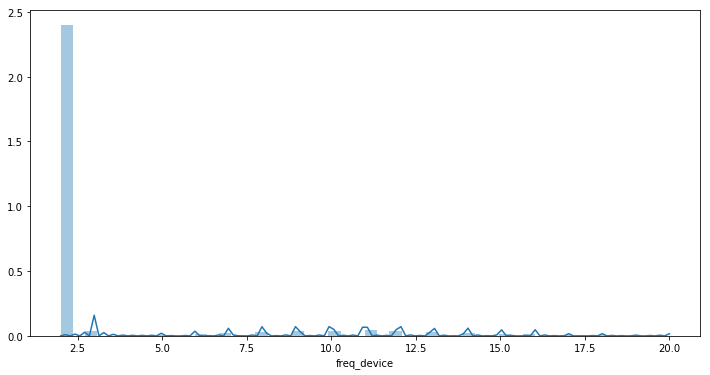

In [29]:
# Plot histogram
plt.figure(figsize = (12,6))
#plt.subplot(1,2,1)
sns.distplot(dup_devices.freq_device)
# plt.subplot(1,2,2)
# plt.hist(dup_devices.freq_device)
# plt.show()

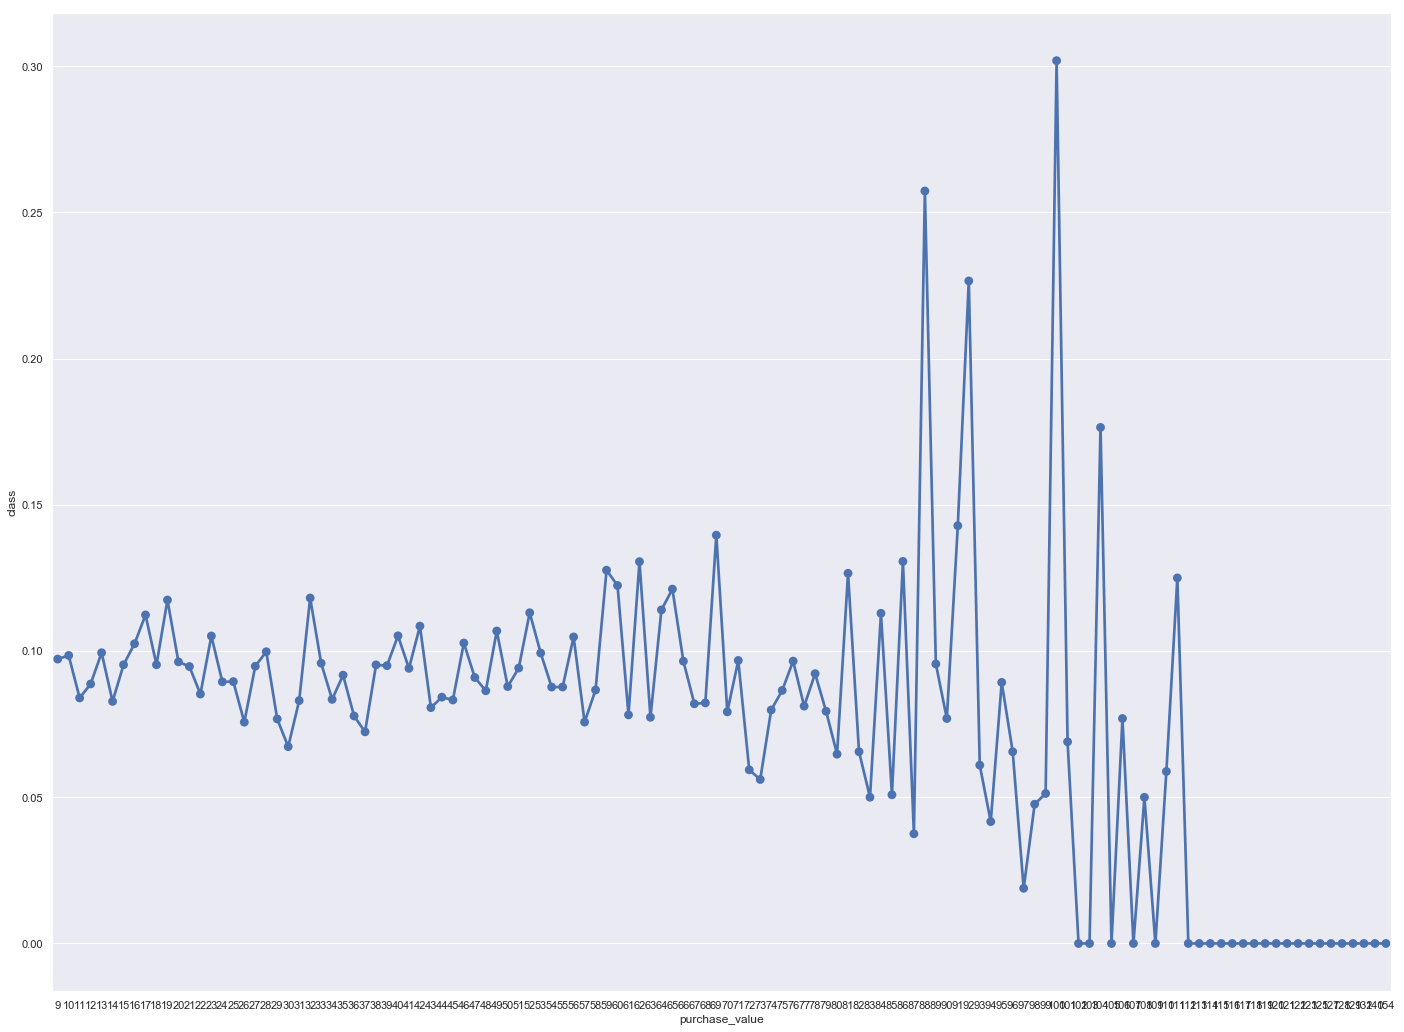

In [214]:
# Xét khả năng gian lận trên các feature
plt.figure(figsize = (24,18))
sns.set(style="darkgrid")
sns.pointplot(x = "purchase_value",y = 'class', data = data_train,logistic= True, ci=None)
plt.show()

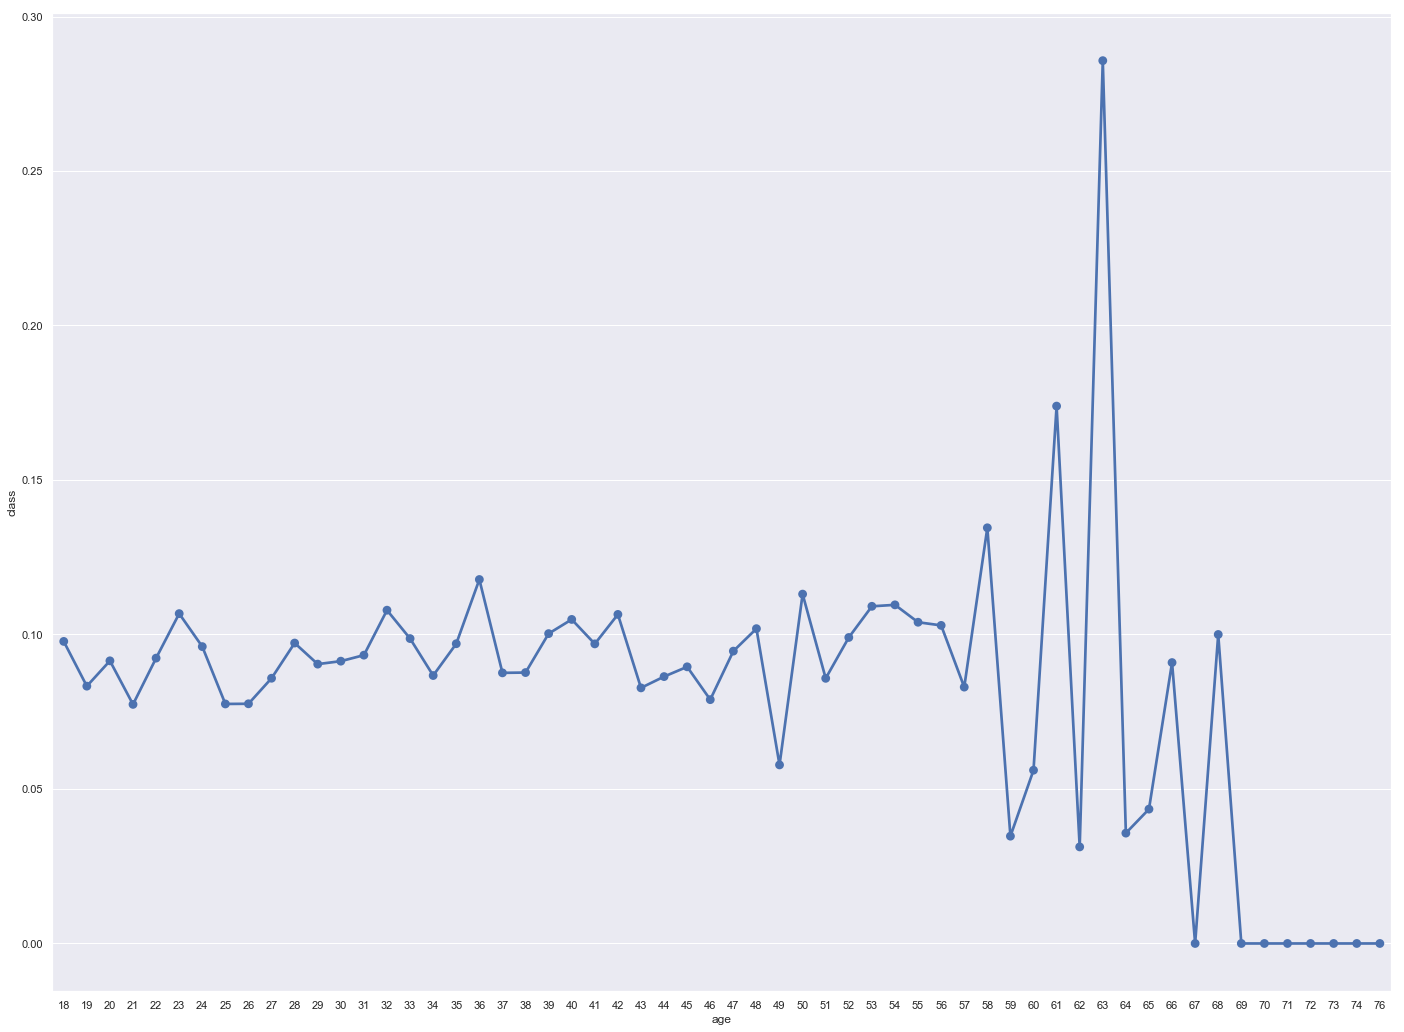

In [31]:
plt.figure(figsize = (24,18))
sns.pointplot(x = "age", y= "class", data = data_train, logistic=True, ci=None)
plt.show()

In [223]:
s = data_train[['class','age']]
s[s['age']== 68]

,class,age
2614,0,68
67983,0,68
78818,1,68
79458,0,68
92304,0,68
108221,0,68
111673,0,68
131007,0,68
138724,0,68
145297,0,68


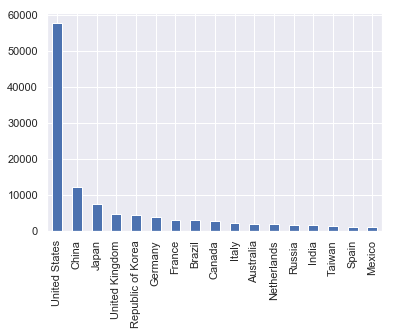

In [32]:
# Thống kê theo quốc gia
sns.set()
country_count = data_train.groupby('country').size()
data_train.country.value_counts()[data_train.country.value_counts() >1000].plot(kind="bar")

In [33]:
# Fraudsters often try to mask their IP Address, so you cannot see that they are placing the order from a different state or country. 
# Utilize technology that can tell you whether the IP address is legitimate.

### 1.5 Univariate Analysis

### Numerical variable

In [34]:
# Age
data_train['age'].describe(include = 'all')

count    151112.000000
mean         33.140704
std           8.617733
min          18.000000
25%          27.000000
50%          33.000000
75%          39.000000
max          76.000000
Name: age, dtype: float64

In [35]:
age_median = data_train.age.median()
age_median

33.0

In [36]:
age_mode = data_train.age.mode()
age_mode

0    32
dtype: int64

In [37]:
# check min, max co thuoc (mean - 3*std, mean + 3*std) or mean co thuoc 10% median
data_train.age.mean()-3*data_train.age.std(), data_train.age.mean()+3*data_train.age.std()  

(7.287503111212153, 58.99390405698097)

In [38]:
# Q1,Q3
Q1_age = np.percentile(data_train.age,25)
Q3_age = np.percentile(data_train.age,75)
Q1_age, Q3_age

(27.0, 39.0)

In [39]:
age_iqr = scipy.stats.iqr(data_train.age)
age_iqr

12.0

In [40]:
age_var = data_train.age.var()
age_var

74.26533052123897

In [41]:
age_std = data_train.age.std()
age_std

8.61773349096147

In [42]:
age_skew = data_train.age.skew()
age_skew
# Phân phối lệch phải rất ít

0.4254805669604524

In [43]:
scipy.stats.skew(data_train.age)

0.4254763434533169

In [44]:
prin_kur = data_train.age.kurtosis()
prin_kur
# Phân phối nhọn hơn phân phối chuẩn

-0.1733995302366549

c:\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


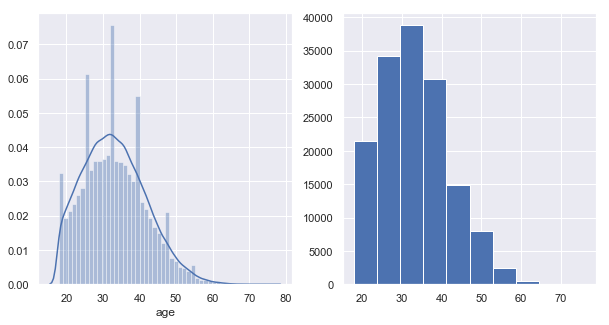

In [45]:
# Visuallization
# Histogram
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(data_train.age)
plt.subplot(1,2,2)
plt.hist(data_train.age)
plt.show()

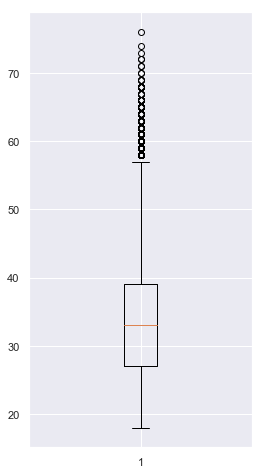

In [46]:
# Boxplot
plt.figure(figsize=(4,8))
plt.boxplot(data_train.age)
plt.show()

In [47]:
# number of upper outliers
n_o_upper = data_train[data_train.age > (Q3_age+1.3* age_iqr)].shape[0]
n_o_upper

1749

In [48]:
# Percentage od outliers
outlier_per_age = n_o_upper/data_train.shape[0]
outlier_per_age

0.01157419662237281

In [49]:
# from scipy.stats import zscore
# data_train["age_zscore"] = zscore(data_train["age"])
# data_train["is_outlier"] = data_train["age_zscore"].apply(lambda x: x <= -3 or x >= 3)
# data_train[data_train["is_outlier"]]

In [50]:
data_train.age.shape[0]

151112

In [51]:
def removeOutliers(x, outlierConstant):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    
    result = a[np.where((a >= quartileSet[0]) & (a <= quartileSet[1]))]
    return result.tolist()

In [52]:
len(removeOutliers(data_train.age,1.5))

150336

In [53]:
def remove_outliers(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    oa = Q3 +  1.37*IQR
    ob = Q1 -  1.37*IQR
    return col[(col > ob) & (col < oa)]

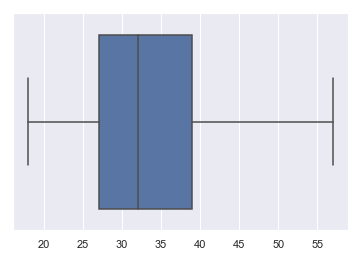

In [54]:
age_clean = removeOutliers(data_train.age, 1.5)
sns.boxplot(age_clean)

In [55]:
# signup_time
data_train["signup_time"].describe(include=all)

count                  151112
unique                 151112
top       2015-06-30 03:58:38
freq                        1
first     2015-01-01 00:00:42
last      2015-08-18 04:40:29
Name: signup_time, dtype: object

In [56]:
data_train["signup_time"].mode() 

0        2015-01-01 00:00:42
1        2015-01-01 00:00:43
2        2015-01-01 00:00:44
3        2015-01-01 00:00:45
4        2015-01-01 00:00:46
5        2015-01-01 00:00:47
6        2015-01-01 00:00:48
7        2015-01-01 00:00:49
8        2015-01-01 00:00:50
9        2015-01-01 00:00:51
10       2015-01-01 00:04:11
11       2015-01-01 00:05:19
12       2015-01-01 00:07:11
13       2015-01-01 00:08:56
14       2015-01-01 00:09:55
15       2015-01-01 00:12:09
16       2015-01-01 00:12:10
17       2015-01-01 00:12:11
18       2015-01-01 00:12:12
19       2015-01-01 00:12:13
20       2015-01-01 00:12:14
21       2015-01-01 00:12:15
22       2015-01-01 00:12:16
23       2015-01-01 00:12:17
24       2015-01-01 00:12:18
25       2015-01-01 00:12:19
26       2015-01-01 00:13:54
27       2015-01-01 00:18:35
28       2015-01-01 00:19:09
29       2015-01-01 00:21:35
                 ...        
151082   2015-08-18 03:41:37
151083   2015-08-18 03:42:33
151084   2015-08-18 03:43:45
151085   2015-

In [57]:
np.array(data_train["signup_time"]).ptp()

numpy.timedelta64(19802387000000000,'ns')

### Categorical Variable

+ user_id
+ device_id
+ source
+ browser
+ sex
+ ip_address
+ country


### user_id

In [58]:
# user_id
prin_count = data_train["user_id"].value_counts(dropna=False)
#print(prin_count)

### device_id

In [59]:
# device_id
device_id_count = data_train.groupby('device_id').size()

### browser

In [60]:
# education
browser_count = data_train.groupby('browser').size()
browser_count

browser
Chrome     61432
FireFox    24610
IE         36727
Opera       3676
Safari     24667
dtype: int64

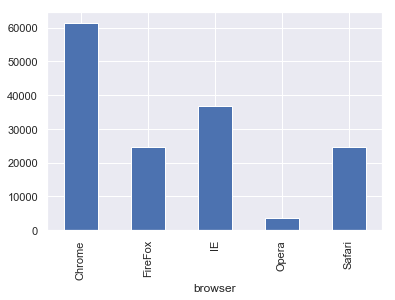

In [61]:
sns.set()
browser_count.plot.bar()

### source

In [62]:
# Gender
source_count = data_train.groupby('source').size()
source_count

source
Ads       59881
Direct    30616
SEO       60615
dtype: int64

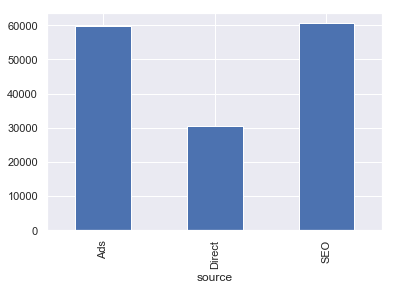

In [63]:
sns.set()
source_count.plot.bar()

### sex

In [64]:
# sex
sex_count = data_train["sex"].value_counts(dropna=False)
sex_count

M    88293
F    62819
Name: sex, dtype: int64

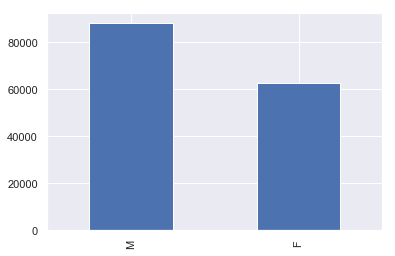

In [65]:
sns.set()
sex_count.plot.bar()

### ip_address

In [66]:
# sex
ip_address_count = data_train["ip_address"].value_counts(dropna=False)
ip_address_count.head()

34.85.253.200     20
230.244.27.241    20
89.147.48.115     20
122.63.57.176     20
107.29.25.29      19
Name: ip_address, dtype: int64

### country

In [67]:
# Country
country_count = data_train.groupby('country').size()
country_count.count()

196

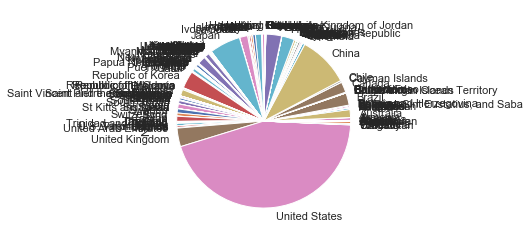

In [68]:
sns.set()
country_count.plot.pie()

### 1.4 Bi-variate Analysis

### 1.4.1 Continuous & Continuous

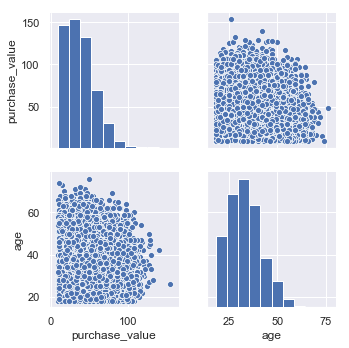

In [69]:
# Continuous & Continuous
sns.pairplot(data_train[['purchase_value','age']])

#### => Không có quan hệ tuyến tính

### 1.4.2 Categoricals & Categoricals

+ user_id  & source
+ device_id & source
+ source & sex
+ browser & sex
+ ip_address & browser

#### 1.4.2.1 source & user_id

In [70]:
# source & user_id
table_Gl = data_train[['source','user_id']].groupby('source').count()
table_Gl

,user_id
source,
Ads,59881
Direct,30616
SEO,60615


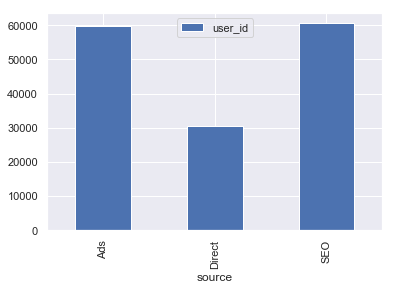

In [71]:
table_Gl.plot(kind = 'bar', stacked = True)
plt.show()

In [72]:
# Chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [73]:
# Chi-Squared Test
stat, p, dof, expect = chi2_contingency(table_Gl)
print('dof = %d' %dof)
print('p=',p)

dof = 0
p= 1.0


In [74]:
# interpret test-statistic
prob_gl = 0.95
critical_gl = chi2.ppf(prob_gl,dof)
print('probability = %.3f, critical = %.3f, stat_gl = %.3f' % (prob_gl,critical_gl,stat))

probability = 0.950, critical = nan, stat_gl = 0.000


In [75]:
# interpret p-value
alpha_gl = 1 - prob_gl
print('significance = %.3f, p = %.3f'%(alpha_gl,p))
if p <= alpha_gl:
    print('Dependent')
else:
    print('Indepent')

significance = 0.050, p = 1.000
Indepent


#### 1.4.2.2  device_id & source

In [76]:
# source & user_id
table_Ds = data_train[['source','device_id']].groupby('source').count()
table_Ds

,device_id
source,
Ads,59881
Direct,30616
SEO,60615


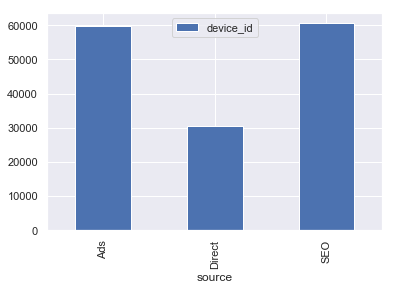

In [77]:
table_Ds.plot(kind = 'bar', stacked = True)
plt.show()

In [78]:
# Chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [79]:
# Chi-Squared Test
stat, p, dof, expect = chi2_contingency(table_Ds)
print('dof = %d' %dof)
print('p=',p)

dof = 0
p= 1.0


In [80]:
# interpret test-statistic
prob_gl = 0.95
critical_gl = chi2.ppf(prob_gl,dof)
print('probability = %.3f, critical = %.3f, stat_gl = %.3f' % (prob_gl,critical_gl,stat))

probability = 0.950, critical = nan, stat_gl = 0.000


In [81]:
# interpret p-value
alpha_gl = 1 - prob_gl
print('significance = %.3f, p = %.3f'%(alpha_gl,p))
if p <= alpha_gl:
    print('Dependent')
else:
    print('Indepent')

significance = 0.050, p = 1.000
Indepent


#### 1.4.2.3  source & sex

In [82]:
# education 
table_El =  pd.crosstab(data_train['source'],data_train['sex'])
table_El

sex,F,M
source,,
Ads,24901,34980
Direct,12780,17836
SEO,25138,35477


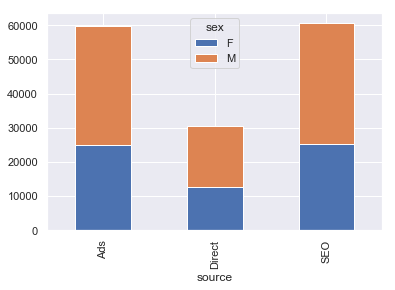

In [83]:
table_El.plot(kind = 'bar', stacked = True)
plt.show()

In [84]:
# Chi-Squared Test
stat, p, dof, expect = chi2_contingency(table_El)
print('dof = %d' %dof)
print('p=',p)

dof = 2
p= 0.7322452683895261


In [85]:
# interpret test-statistic
prob_el = 0.95
critical_el = chi2.ppf(prob_el,dof)
print('probability = %.3f, critical = %.3f, stat_gl = %.3f' % (prob_el,critical_el,stat))

probability = 0.950, critical = 5.991, stat_gl = 0.623


In [86]:
# interpret p-value
alpha_el = 1 - prob_el
print('significance = %.3f, p = %.3f'%(alpha_el,p))
if p <= alpha_el:
    print('Dependent')
else:
    print('Indepent')


significance = 0.050, p = 0.732
Indepent


#### 1.4.2.4  sex & browser

In [87]:
table_PT = pd.crosstab(data_train["browser"],data_train["sex"])
table_PT

sex,F,M
browser,,
Chrome,25558,35874
FireFox,10220,14390
IE,15275,21452
Opera,1466,2210
Safari,10300,14367


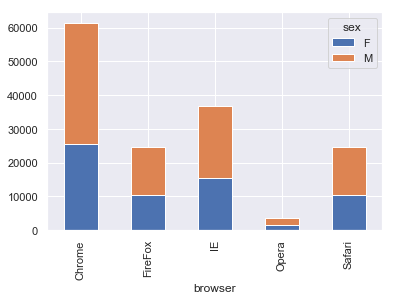

In [88]:
table_PT.plot(kind = "bar", stacked = True)

In [89]:
#Chi-Square Test
stat, p, dof, expected = chi2_contingency(table_PT)
print("dot=%d" %dof)
print("p=", p)

dot=4
p= 0.3165730898463197


In [90]:
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob,dof)
print("probability=%.3f, critical=%.3f, stat =%.3f" %(prob, critical,stat))

probability=0.950, critical=9.488, stat =4.726


In [91]:
#interpret p-value
alpha = 1.0-prob
print("significance = %.3f, p= %.3f" %(alpha,p))
if p<alpha:
    print("Dependent(reject H0)")
else:
    print("Independent(fail to reject H0)")

significance = 0.050, p= 0.317
Independent(fail to reject H0)


In [92]:
# Nhận xét: 2 biến không có mối quan hệ với nhau

#### 1.4.2.5 ip_address & browser

In [93]:
table_PG = data_train[["browser","ip_address"]].groupby(["browser"]).count()
table_PG

,ip_address
browser,
Chrome,61432
FireFox,24610
IE,36727
Opera,3676
Safari,24667


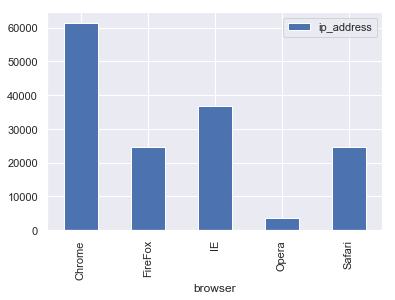

In [94]:
table_PG.plot(kind = "bar", stacked = True)

In [95]:
#Chi-Square Test
stat, p, dof, expected = chi2_contingency(table_PG)
print("dot=%d" %dof)
print("p=", p)

dot=0
p= 1.0


In [96]:
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob,dof)
print("probability=%.3f, critical=%.3f, stat =%.3f" %(prob, critical,stat))
#interpret p-value
alpha = 1.0-prob
print("significance = %.3f, p= %.3f" %(alpha,p))
if p<alpha:
    print("Dependent(reject H0)")
else:
    print("Independent(fail to reject H0)")

probability=0.950, critical=nan, stat =0.000
significance = 0.050, p= 1.000
Independent(fail to reject H0)


In [97]:
# Nhận xét: hai biến độc không có mối quan hệ với nhau

### sex & country

In [98]:
table_TC = data_train[["sex","country"]].groupby(["sex"]).count()
table_TC

,country
sex,
F,53720
M,75438


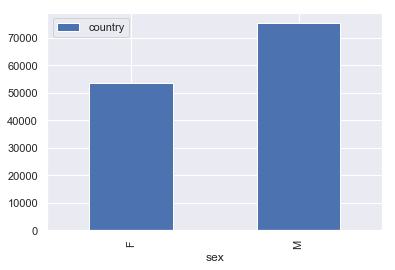

In [99]:
table_TC.plot(kind = "bar", stacked = True)

In [100]:
#Chi-Square Test
stat, p, dof, expected = chi2_contingency(table_TC)
print("dot=%d" %dof)
print("p=", p)

dot=0
p= 1.0


In [101]:
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob,dof)
print("probability=%.3f, critical=%.3f, stat =%.3f" %(prob, critical,stat))
#interpret p-value
alpha = 1.0-prob
print("significance = %.3f, p= %.3f" %(alpha,p))
if p<alpha:
    print("Dependent(reject H0)")
else:
    print("Independent(fail to reject H0)")

probability=0.950, critical=nan, stat =0.000
significance = 0.050, p= 1.000
Independent(fail to reject H0)


In [102]:
# Nhận xét: hai biến không có quan hệ với nhau

In [103]:
data_train.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,freq_device
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,43.173.1.96,0,Japan,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,20.225.83.219,0,United States,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,156.64.132.28,1,United States,12
3,48288,2015-01-01 18:52:41,2015-01-01 18:52:42,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,156.64.132.28,1,United States,12
4,128706,2015-01-01 18:52:40,2015-01-01 18:52:41,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,156.64.132.28,1,United States,12


In [104]:
data_train.isnull().sum() # Khong co du lieu thieu

user_id               0
signup_time           0
purchase_time         0
purchase_value        0
device_id             0
source                0
browser               0
sex                   0
age                   0
ip_address            0
class                 0
country           21954
freq_device           0
dtype: int64

### 1.4.3 Categoricals & Continuous

+ purchase_value
+ age
+ time 
+ device-id
+ source
+ sex

c:\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


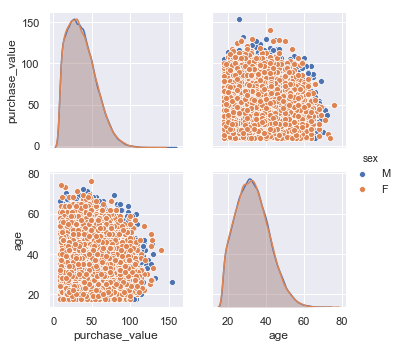

In [105]:
sns.pairplot(data_train[['purchase_value','age','sex']],hue="sex")
plt.show()

In [107]:
len(data_train.ip_address.unique())

143510

In [ ]:
# I'm doing

### 1.5 Handle the Missing Values and Outlier Values

+ Phần xử lý ngoại lệ đã thực hiện ở trên

# 2. Data visualization

How many sample of each class is in our data set?

In [108]:
# code
status_count = data_train[['class','age','sex']].groupby(['class']).count()

In [109]:
status_count

,age,sex
class,,
0,136961,136961
1,14151,14151


Lets plot some columns to underestand data better:
- Use seaborn or matplotlib to draw some plots like that:

In [110]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

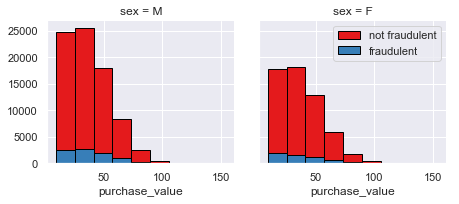

In [111]:
# plt.figure(figsize = (20,20))
# sns.set(style="ticks")
bins = np.linspace(data_train.purchase_value.min(),data_train.purchase_value.max(),10)
g_prin = sns.FacetGrid(data_train, col = 'sex', hue = 'class', palette = 'Set1', col_wrap = 10, height=3,aspect=1,)
g_prin.map(plt.hist,'purchase_value', edgecolor="black", bins = bins)
g_prin.axes[-1].legend()
plt.legend(('not fraudulent','fraudulent'))
plt.show()

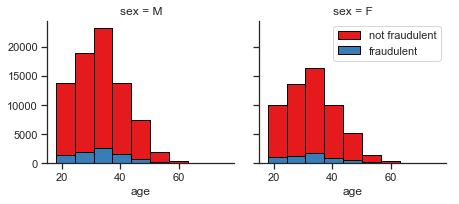

In [112]:
# code here
bins = np.linspace(data_train.age.min(),data_train.age.max(),10)
sns.set(style="ticks")
g_age = sns.FacetGrid(data_train, col = 'sex', hue = 'class',palette = 'Set1', col_wrap = 10, height=3,aspect=1,)
g_age.map(plt.hist,'age', bins = bins, edgecolor="black")
g_age.axes[-1].legend()
plt.legend(( 'not fraudulent','fraudulent'))
#fig.tight_layout()
plt.show()

# 3. Pre-processing:  Feature selection/extraction

- Make new column 'dayofweek' from 'effective_date'
    - Example: 2016-09-08 => dayofweek is 3 (The day of the week with Monday=0, Sunday=6)
    - Link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html

### 3.1 Datetime extraction

In [113]:
# Make new column 'dayofweek' from 'purchase_time'
import datetime as dt
data_train['dayofweek'] = data_train.signup_time.dt.dayofweek
data_train.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,freq_device,dayofweek
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,43.173.1.96,0,Japan,1,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,20.225.83.219,0,United States,1,6
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,156.64.132.28,1,United States,12,3
3,48288,2015-01-01 18:52:41,2015-01-01 18:52:42,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,156.64.132.28,1,United States,12,3
4,128706,2015-01-01 18:52:40,2015-01-01 18:52:41,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,156.64.132.28,1,United States,12,3


In [114]:
data_train['weekday_purchase'] = data_train.purchase_time.apply(lambda x: x.year)

In [115]:
data_train['month_purchase'] = data_train.purchase_time.apply(lambda x: x.month)

In [116]:
data_train['hour_of_the_day'] = data_train.purchase_time.apply(lambda x: x.hour)

In [117]:
data_train['seconds_since_signup'] = (data_train.purchase_time-data_train.signup_time).apply(lambda x: x.total_seconds())

In [118]:
data_train.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,freq_device,dayofweek,weekday_purchase,month_purchase,hour_of_the_day,seconds_since_signup
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,43.173.1.96,0,Japan,1,1,2015,4,2,4506682.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,20.225.83.219,0,United States,1,6,2015,6,1,17944.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,156.64.132.28,1,United States,12,3,2015,1,18,1.0
3,48288,2015-01-01 18:52:41,2015-01-01 18:52:42,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,156.64.132.28,1,United States,12,3,2015,1,18,1.0
4,128706,2015-01-01 18:52:40,2015-01-01 18:52:41,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,156.64.132.28,1,United States,12,3,2015,1,18,1.0


In [119]:
data_train.dayofweek.unique()

array([1, 6, 3, 5, 0, 4, 2], dtype=int64)

In [120]:
data_train.month_purchase.unique()

array([ 4,  6,  1,  5,  9,  7,  8,  3, 10, 11,  2, 12], dtype=int64)

In [121]:
data_train.hour_of_the_day.unique()

array([ 2,  1, 18,  7, 13,  8,  3, 17, 14, 23, 21,  5, 12,  0, 10, 22, 15,
       20,  4,  6,  9, 11, 16, 19], dtype=int64)

In [122]:
data_train.groupby('dayofweek').dayofweek.count()

dayofweek
0    21871
1    20812
2    20584
3    21880
4    22096
5    21762
6    22107
Name: dayofweek, dtype: int64

In [123]:
data_train.groupby('dayofweek').dayofweek.count()

dayofweek
0    21871
1    20812
2    20584
3    21880
4    22096
5    21762
6    22107
Name: dayofweek, dtype: int64

In [124]:
data_train.groupby('month_purchase').dayofweek.count()

month_purchase
1     10097
2      6449
3     12090
4     16551
5     19364
6     18908
7     19507
8     18662
9     14347
10     9815
11     4743
12      579
Name: dayofweek, dtype: int64

In [125]:
data_train.groupby('hour_of_the_day').hour_of_the_day.count()

hour_of_the_day
0     6186
1     6228
2     6338
3     6458
4     6050
5     6189
6     6380
7     6181
8     6387
9     6418
10    6100
11    6327
12    6403
13    6292
14    6355
15    6369
16    6309
17    6466
18    6252
19    6299
20    6221
21    6224
22    6358
23    6322
Name: hour_of_the_day, dtype: int64

In [126]:
big_time = data_train[data_train['seconds_since_signup']==1]

In [127]:
big_time.shape

(7600, 18)

Lets plot some columns to underestand data better:

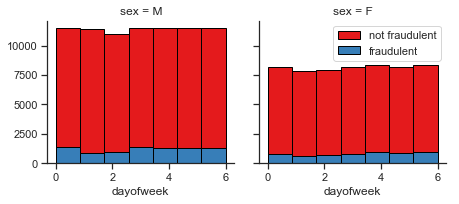

In [128]:
# code here
bins = np.linspace(data_train.dayofweek.min(),data_train.dayofweek.max(),8)
sns.set(style="ticks")
g_day = sns.FacetGrid(data_train, col = 'sex', hue = 'class',palette = 'Set1', col_wrap = 10, height=3,aspect=1,)
g_day.map(plt.hist,'dayofweek',bins= bins, edgecolor="black")
g_day.axes[-1].legend()
plt.legend( ('not fraudulent','fraudulent'))
plt.show()

#### -> giao dịch phân bố đều vào các ngày trong tuần

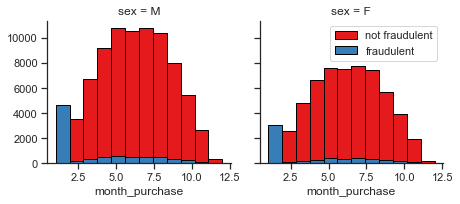

In [129]:
bins = np.linspace(data_train.month_purchase.min(),data_train.month_purchase.max(),13)
sns.set(style="ticks")
g_day = sns.FacetGrid(data_train, col = 'sex', hue = 'class',palette = 'Set1', col_wrap = 10, height=3,aspect=1,)
g_day.map(plt.hist,'month_purchase',bins= bins, edgecolor="black")
g_day.axes[-1].legend()
plt.legend( ('not fraudulent','fraudulent'))
plt.show()

#### -> giao dịch gian lận phân bố đều nhiều nhât vào tháng 1 

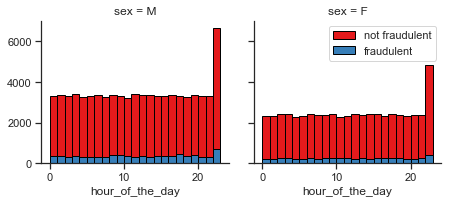

In [130]:
bins = np.linspace(data_train.hour_of_the_day.min(),data_train.hour_of_the_day.max(),24)
sns.set(style="ticks")
g_day = sns.FacetGrid(data_train, col = 'sex', hue = 'class',palette = 'Set1', col_wrap = 10, height=3,aspect=1,)
g_day.map(plt.hist,'hour_of_the_day',bins= bins, edgecolor="black")
g_day.axes[-1].legend()
plt.legend( ('not fraudulent','fraudulent'))
plt.show()

#### -> số lượng giao dịch phân bố tương đối đều vào các giờ trong ngày và giờ khuya - gần 23h là nhiều hơn các giờ khác

In [131]:
# age categorisation

data_train["age_category"] = data_train.age.apply(lambda x : 
                 "< 40" if x < 40 else
                 "40 - 49" if x < 50 else
                 "50 -59" if x < 60 else
                 "60 - 69" if x < 70 else
                 " > 70")

In [132]:
# Hour of the day categorisation
data_train["period_of_the_day"] = data_train.hour_of_the_day.apply(lambda x : 
                                                             "late night" if x < 4 else
                                                             "early morning" if x < 8 else
                                                             "morning" if x < 12 else
                                                             "afternoon" if x < 16 else
                                                             "evening" if x < 20 else
                                                             "night"
                                                            )

In [133]:
data_train.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,freq_device,dayofweek,weekday_purchase,month_purchase,hour_of_the_day,seconds_since_signup,age_category,period_of_the_day
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,43.173.1.96,0,Japan,1,1,2015,4,2,4506682.0,< 40,late night
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,20.225.83.219,0,United States,1,6,2015,6,1,17944.0,50 -59,late night
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,156.64.132.28,1,United States,12,3,2015,1,18,1.0,50 -59,evening
3,48288,2015-01-01 18:52:41,2015-01-01 18:52:42,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,156.64.132.28,1,United States,12,3,2015,1,18,1.0,50 -59,evening
4,128706,2015-01-01 18:52:40,2015-01-01 18:52:41,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,156.64.132.28,1,United States,12,3,2015,1,18,1.0,50 -59,evening


## Convert Categorical features to numerical values

Lets convert male to 0 and female to 1:


In [134]:
# code here
data_train['sex']= data_train['sex'].replace(['M','F'],[0,1])

In [135]:
data_train.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,freq_device,dayofweek,weekday_purchase,month_purchase,hour_of_the_day,seconds_since_signup,age_category,period_of_the_day
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,0,39,43.173.1.96,0,Japan,1,1,2015,4,2,4506682.0,< 40,late night
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,1,53,20.225.83.219,0,United States,1,6,2015,6,1,17944.0,50 -59,late night
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,0,53,156.64.132.28,1,United States,12,3,2015,1,18,1.0,50 -59,evening
3,48288,2015-01-01 18:52:41,2015-01-01 18:52:42,15,YSSKYOSJHPPLJ,SEO,Opera,0,53,156.64.132.28,1,United States,12,3,2015,1,18,1.0,50 -59,evening
4,128706,2015-01-01 18:52:40,2015-01-01 18:52:41,15,YSSKYOSJHPPLJ,SEO,Opera,0,53,156.64.132.28,1,United States,12,3,2015,1,18,1.0,50 -59,evening


## Label Encoding  

In [136]:
from sklearn import preprocessing 

In [137]:
label_encoder = preprocessing.LabelEncoder() 
data_train['device_id']= label_encoder.fit_transform(data_train['device_id']) 
data_train['country']= label_encoder.fit_transform(data_train['country'])

In [138]:
data_train.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,freq_device,dayofweek,weekday_purchase,month_purchase,hour_of_the_day,seconds_since_signup,age_category,period_of_the_day
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,89215,SEO,Chrome,0,39,43.173.1.96,0,Japan,1,1,2015,4,2,4506682.0,< 40,late night
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,24078,Ads,Chrome,1,53,20.225.83.219,0,United States,1,6,2015,6,1,17944.0,50 -59,late night
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,131216,SEO,Opera,0,53,156.64.132.28,1,United States,12,3,2015,1,18,1.0,50 -59,evening
3,48288,2015-01-01 18:52:41,2015-01-01 18:52:42,15,131216,SEO,Opera,0,53,156.64.132.28,1,United States,12,3,2015,1,18,1.0,50 -59,evening
4,128706,2015-01-01 18:52:40,2015-01-01 18:52:41,15,131216,SEO,Opera,0,53,156.64.132.28,1,United States,12,3,2015,1,18,1.0,50 -59,evening


## One Hot Encoding  


#### Feature befor One Hot Encoding
- Print head() data with 5 columns: source 	browser age_category 	period_of_the_day

In [165]:
# code here
df_train_sub = data_train

In [166]:
df_train_sub.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,freq_device,dayofweek,weekday_purchase,month_purchase,hour_of_the_day,seconds_since_signup,age_category,period_of_the_day
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,89215,SEO,Chrome,0,39,43.173.1.96,0,Japan,1,1,2015,4,2,4506682.0,< 40,late night
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,24078,Ads,Chrome,1,53,20.225.83.219,0,United States,1,6,2015,6,1,17944.0,50 -59,late night
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,131216,SEO,Opera,0,53,156.64.132.28,1,United States,12,3,2015,1,18,1.0,50 -59,evening
3,48288,2015-01-01 18:52:41,2015-01-01 18:52:42,15,131216,SEO,Opera,0,53,156.64.132.28,1,United States,12,3,2015,1,18,1.0,50 -59,evening
4,128706,2015-01-01 18:52:40,2015-01-01 18:52:41,15,131216,SEO,Opera,0,53,156.64.132.28,1,United States,12,3,2015,1,18,1.0,50 -59,evening


In [167]:
df_train_sub1 = pd.get_dummies(df_train_sub, columns = ['source'],prefix='metho_')
df_train_sub1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,browser,sex,age,ip_address,class,...,dayofweek,weekday_purchase,month_purchase,hour_of_the_day,seconds_since_signup,age_category,period_of_the_day,metho__Ads,metho__Direct,metho__SEO
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,89215,Chrome,0,39,43.173.1.96,0,...,1,2015,4,2,4506682.0,< 40,late night,0,0,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,24078,Chrome,1,53,20.225.83.219,0,...,6,2015,6,1,17944.0,50 -59,late night,1,0,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,131216,Opera,0,53,156.64.132.28,1,...,3,2015,1,18,1.0,50 -59,evening,0,0,1
3,48288,2015-01-01 18:52:41,2015-01-01 18:52:42,15,131216,Opera,0,53,156.64.132.28,1,...,3,2015,1,18,1.0,50 -59,evening,0,0,1
4,128706,2015-01-01 18:52:40,2015-01-01 18:52:41,15,131216,Opera,0,53,156.64.132.28,1,...,3,2015,1,18,1.0,50 -59,evening,0,0,1


In [168]:
df_train_sub1 = pd.get_dummies(df_train_sub, columns = ['browser'],prefix='title_')
df_train_sub1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,sex,age,ip_address,class,...,month_purchase,hour_of_the_day,seconds_since_signup,age_category,period_of_the_day,title__Chrome,title__FireFox,title__IE,title__Opera,title__Safari
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,89215,SEO,0,39,43.173.1.96,0,...,4,2,4506682.0,< 40,late night,1,0,0,0,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,24078,Ads,1,53,20.225.83.219,0,...,6,1,17944.0,50 -59,late night,1,0,0,0,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,131216,SEO,0,53,156.64.132.28,1,...,1,18,1.0,50 -59,evening,0,0,0,1,0
3,48288,2015-01-01 18:52:41,2015-01-01 18:52:42,15,131216,SEO,0,53,156.64.132.28,1,...,1,18,1.0,50 -59,evening,0,0,0,1,0
4,128706,2015-01-01 18:52:40,2015-01-01 18:52:41,15,131216,SEO,0,53,156.64.132.28,1,...,1,18,1.0,50 -59,evening,0,0,0,1,0


In [169]:
df_train_sub1 = pd.get_dummies(df_train_sub, columns = ['age_category'],prefix='sub_')
df_train_sub1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,weekday_purchase,month_purchase,hour_of_the_day,seconds_since_signup,period_of_the_day,sub__ > 70,sub__40 - 49,sub__50 -59,sub__60 - 69,sub__< 40
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,89215,SEO,Chrome,0,39,43.173.1.96,...,2015,4,2,4506682.0,late night,0,0,0,0,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,24078,Ads,Chrome,1,53,20.225.83.219,...,2015,6,1,17944.0,late night,0,0,1,0,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,131216,SEO,Opera,0,53,156.64.132.28,...,2015,1,18,1.0,evening,0,0,1,0,0
3,48288,2015-01-01 18:52:41,2015-01-01 18:52:42,15,131216,SEO,Opera,0,53,156.64.132.28,...,2015,1,18,1.0,evening,0,0,1,0,0
4,128706,2015-01-01 18:52:40,2015-01-01 18:52:41,15,131216,SEO,Opera,0,53,156.64.132.28,...,2015,1,18,1.0,evening,0,0,1,0,0


In [170]:
df_train_sub1 = pd.get_dummies(df_train_sub1, columns = ['period_of_the_day'],prefix='sub_')
df_train_sub1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,sub__40 - 49,sub__50 -59,sub__60 - 69,sub__< 40,sub__afternoon,sub__early morning,sub__evening,sub__late night,sub__morning,sub__night
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,89215,SEO,Chrome,0,39,43.173.1.96,...,0,0,0,1,0,0,0,1,0,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,24078,Ads,Chrome,1,53,20.225.83.219,...,0,1,0,0,0,0,0,1,0,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,131216,SEO,Opera,0,53,156.64.132.28,...,0,1,0,0,0,0,1,0,0,0
3,48288,2015-01-01 18:52:41,2015-01-01 18:52:42,15,131216,SEO,Opera,0,53,156.64.132.28,...,0,1,0,0,0,0,1,0,0,0
4,128706,2015-01-01 18:52:40,2015-01-01 18:52:41,15,131216,SEO,Opera,0,53,156.64.132.28,...,0,1,0,0,0,0,1,0,0,0


In [171]:
df_train_sub1 = pd.get_dummies(df_train_sub1, columns = ['country'],prefix='sub_')
df_train_sub1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,sub__United States,sub__Uruguay,sub__Uzbekistan,sub__Vanuatu,sub__Venezuela,sub__Vietnam,sub__Yemen,sub__Zambia,sub__Zimbabwe,sub__Åland
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,89215,SEO,Chrome,0,39,43.173.1.96,...,0,0,0,0,0,0,0,0,0,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,24078,Ads,Chrome,1,53,20.225.83.219,...,1,0,0,0,0,0,0,0,0,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,131216,SEO,Opera,0,53,156.64.132.28,...,1,0,0,0,0,0,0,0,0,0
3,48288,2015-01-01 18:52:41,2015-01-01 18:52:42,15,131216,SEO,Opera,0,53,156.64.132.28,...,1,0,0,0,0,0,0,0,0,0
4,128706,2015-01-01 18:52:40,2015-01-01 18:52:41,15,131216,SEO,Opera,0,53,156.64.132.28,...,1,0,0,0,0,0,0,0,0,0


### Feature selection

In [146]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

Using TensorFlow backend.


Lets defind feature sets, X:
- X is input, X = Feature

In [ ]:
# code here

In [172]:
df_train_sub1.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address',
       ...
       'sub__United States', 'sub__Uruguay', 'sub__Uzbekistan', 'sub__Vanuatu',
       'sub__Venezuela', 'sub__Vietnam', 'sub__Yemen', 'sub__Zambia',
       'sub__Zimbabwe', 'sub__Åland'],
      dtype='object', length=224)

In [173]:
x = df_train_sub1.drop(['source','signup_time', 'purchase_time','ip_address','class','browser'], axis =1)
x.head()

,user_id,purchase_value,device_id,sex,age,freq_device,dayofweek,weekday_purchase,month_purchase,hour_of_the_day,...,sub__United States,sub__Uruguay,sub__Uzbekistan,sub__Vanuatu,sub__Venezuela,sub__Vietnam,sub__Yemen,sub__Zambia,sub__Zimbabwe,sub__Åland
0,22058,34,89215,0,39,1,1,2015,4,2,...,0,0,0,0,0,0,0,0,0,0
1,333320,16,24078,1,53,1,6,2015,6,1,...,1,0,0,0,0,0,0,0,0,0
2,1359,15,131216,0,53,12,3,2015,1,18,...,1,0,0,0,0,0,0,0,0,0
3,48288,15,131216,0,53,12,3,2015,1,18,...,1,0,0,0,0,0,0,0,0,0
4,128706,15,131216,0,53,12,3,2015,1,18,...,1,0,0,0,0,0,0,0,0,0


In [174]:
y = df_train_sub1[['class']]
y.head()

,class
0,0
1,0
2,1
3,1
4,1


In [175]:
X_s, Y_s = SMOTE().fit_resample(x,y)
print(sorted(Counter(Y_s).items()))

c:\python\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[(0, 136961), (1, 136961)]


In [177]:
data_S = pd.DataFrame(X_s)
data_S['target'] = Y_s
data_S.head()

,0,1,2,3,4,5,6,7,8,9,...,209,210,211,212,213,214,215,216,217,target
0,22058.0,34.0,89215.0,0.0,39.0,1.0,1.0,2015.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,333320.0,16.0,24078.0,1.0,53.0,1.0,6.0,2015.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1359.0,15.0,131216.0,0.0,53.0,12.0,3.0,2015.0,1.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,48288.0,15.0,131216.0,0.0,53.0,12.0,3.0,2015.0,1.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,128706.0,15.0,131216.0,0.0,53.0,12.0,3.0,2015.0,1.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [179]:
data_0 = data_S[data_S.target == 0]
data_1 = data_S[data_S.target == 1]

In [182]:
data_0_resample = resample(data_0,
                           replace = True, # sample with replacement
                           n_samples = data_1.shape[0],
                           random_state = 27)

In [184]:
data_0_resample.shape

(136961, 219)

In [185]:
upsample = pd.concat([data_0_resample, data_1])

In [186]:
upsample.target.value_counts()

1    136961
0    136961
Name: target, dtype: int64

# 5. Logistic Regression

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [187]:
X = upsample.drop(['target'], axis = 1)
X.shape

(273922, 218)

In [189]:
Y = upsample['target']

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.8, random_state=0)
model = LogisticRegression()
model.fit(X_train,y_train)

c:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [191]:
model.intercept_

array([2.27773359e-07])

In [192]:
model.coef_

array([[ 9.64904338e-08,  8.89278983e-06,  2.89382387e-07,
         6.33874530e-08,  7.81804804e-06,  1.26928287e-05,
         8.16432431e-07,  4.58963318e-04, -2.64514514e-06,
         2.58627916e-06, -2.58592856e-07, -2.25109069e-10,
         3.90381513e-08,  1.25389886e-08,  1.64109169e-09,
         1.74780236e-07,  3.63051865e-08,  2.91080775e-08,
         5.30359498e-08,  3.44251306e-08,  5.35843404e-08,
         2.13146740e-08,  1.43946157e-10, -1.35922961e-10,
         9.31111836e-10, -3.17162080e-11,  2.02849294e-11,
         0.00000000e+00,  2.73541988e-09, -5.97151701e-11,
        -7.61254481e-10, -1.37897977e-09,  2.35881931e-10,
        -7.01819726e-11, -2.86827698e-10, -7.82737182e-11,
        -3.94237843e-11, -7.00283014e-10,  3.56745599e-09,
        -5.00727832e-11,  0.00000000e+00, -1.00527346e-10,
        -9.41190744e-12,  1.73682444e-09, -2.34224534e-11,
        -2.65055316e-10, -9.38828642e-11,  3.62557501e-09,
        -3.96189508e-11, -3.53004290e-11, -6.98736465e-1

In [193]:
#traning score
model.score(X_train,y_train)

0.6731359834258934

In [194]:
#Testing score
model.score(X_test, y_test)

0.6734142557269326

In [197]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report

In [198]:
y_o_pred = model.predict(X_test)
accuracy_score(y_test,y_o_pred)

0.6734142557269326

In [200]:
# Evaluation
conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_o_pred)
print("confusion matrix:\n", conf_matrix)

confusion matrix:
 [[17532  9828]
 [ 8064 19361]]


# 6. Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Accuracy Score | F1-score |
|--------------------|---------|----------|
| LogisticRegression | 67.3%  | 0.67     |